In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

In [2]:
data=pd.read_csv('C:\\Users\\DELL\\Unsupervised/airplane.csv',encoding='unicode_escape')
data

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJRÂ,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [3]:
data.isna().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [17]:
data['Location'].unique()

array(['Fort Myer, Virginia', 'AtlantiCity, New Jersey',
       'Victoria, British Columbia, Canada', ...,
       'AtlantiOcean, 570 miles northeast of Natal, Brazil',
       'Near Port Hope Simpson, Newfoundland, Canada',
       'State of Arunachal Pradesh, India'], dtype=object)

In [4]:
data.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [6]:
m=data.dropna()
m

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
208,01/19/1930,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,16.0,0.0,"While en route to Los Angeles, the pilot, flyi..."
236,03/31/1931,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,8.0,0.0,"Shortly after taking off from Kansas City, one..."
334,08/31/1934,23:42,"Amazonia, Missouri",Rapid Air Transport,6,Omaha - St. Joseph,Stinson SM-6000B,NC10809,5004,5.0,5.0,0.0,The plane crashed about 11 miles from St. Jose...
354,05/06/1935,03:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,5.0,0.0,The plane crashed while en route from Albuquer...
365,08/14/1935,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,4.0,0.0,Crashed 3 miles south of Gilmer. The outboard ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,02/12/2009,22:17,"Clarence Center, New York",Continental Connection/Colgan Air,3407,"Newark, N.J. - Buffalo, NY",Bombardier DHC-8-402 Q400,N200WQ,4200,49.0,49.0,1.0,The commuter plane crashed while attemptiong t...
5251,02/25/2009,10:31,"Amsterdam, Netherlands",Turkish Airlines,1951,"Istanbul, Turkey - Amsterdam, Netherlands",Boeing 737-8F2,TC-JGE,29789/1065,134.0,9.0,0.0,The plane was on final approach to Runway 18R ...
5255,03/23/2009,06:48,"Tokyo, Japan",FedEx,80,"Guangzhou, China - Tokyo, Japan",McDonnell Douglas MD-11,N526FE,48600/560,2.0,2.0,0.0,The cargo plane crashed and burst into flame a...
5259,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,11.0,0.0,The passenger plane crashed in poor weather in...


In [7]:
m.isnull().sum()

Date            0
Time            0
Location        0
Operator        0
Flight #        0
Route           0
Type            0
Registration    0
cn/In           0
Aboard          0
Fatalities      0
Ground          0
Summary         0
dtype: int64

In [8]:
data.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
w=('Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary')
for i in w:
   m[i]=le.fit_transform(m[i])
q=m.head(20)
q

C:\Users\DELL\AppData\Local\Temp\ipykernel_14512\373773604.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m[i]=le.fit_transform(m[i])
C:\Users\DELL\AppData\Local\Temp\ipykernel_14512\373773604.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m[i]=le.fit_transform(m[i])
C:\Users\DELL\AppData\Local\Temp\ipykernel_14512\373773604.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
208,63,453,609,297,490,39,402,753,755,15,16,0,886
236,246,225,45,470,433,369,400,680,77,7,8,0,276
334,577,602,16,392,434,641,543,681,756,4,5,0,722
354,319,56,30,470,434,431,330,690,128,13,5,0,767
365,534,603,440,181,307,216,545,693,845,3,4,0,78
370,683,42,408,498,307,738,88,683,176,11,12,0,897
382,44,493,178,75,19,625,331,692,133,16,17,0,192
390,263,216,823,470,19,618,330,686,116,14,13,0,102
419,867,52,549,516,434,142,88,685,257,6,7,0,104
421,875,528,498,190,72,511,330,689,121,13,14,0,134


<Axes: xlabel='Flight #', ylabel='Fatalities'>

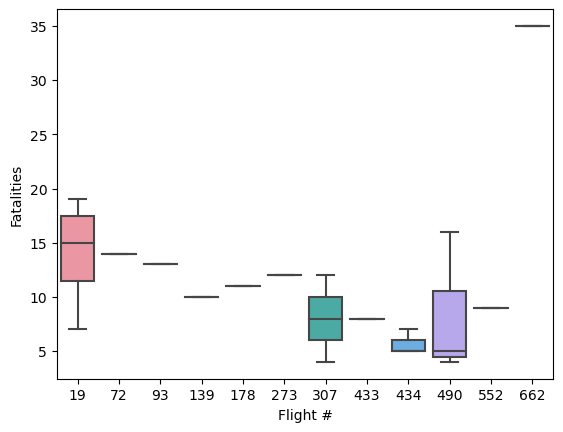

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="Flight #", y="Fatalities", data=q)


<Axes: >

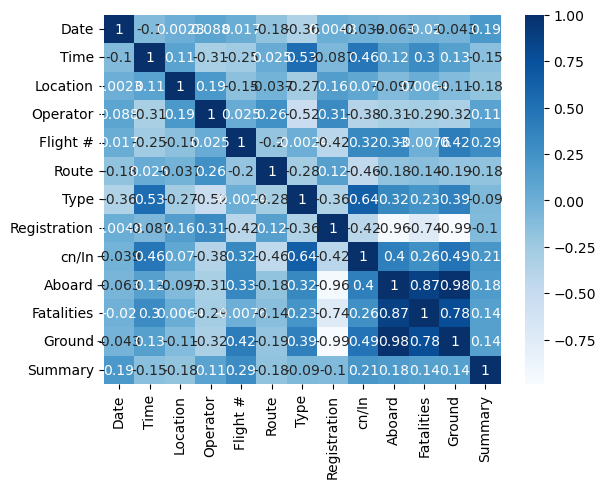

In [11]:
sns.heatmap(q.corr(),annot=True,cmap="Blues")

In [12]:
from sklearn.cluster import KMeans
eq=[]
for i in range(1,6):
    km=KMeans(n_clusters=i)
    km.fit(q)
    eq.append(sum(np.min(cdist(q,km.cluster_centers_,"euclidean"),axis=1))/q.shape[0])
print(eq)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

[700.6532526159839, 613.9951881556433, 537.8111662396781, 498.25576258111124, 455.0292613556965]


[1, 2, 3, 4, 5]


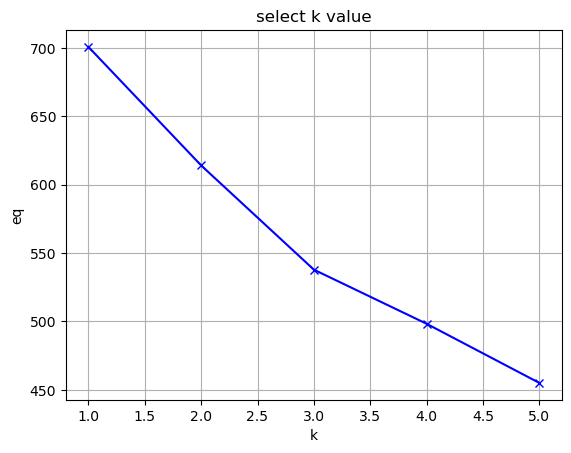

In [13]:
import matplotlib.pyplot as plt
k=range(1,6)
print(list(k))
plt.plot(k,eq,"bx-")
plt.grid()
plt.xlabel("k")
plt.ylabel("eq")
plt.title("select k value")
plt.show()

In [14]:
jk=KMeans(n_clusters=3)
fh=jk.fit_predict(q)
fh
print(jk.cluster_centers_)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[3.05200000e+02 5.28600000e+02 4.00400000e+02 2.82600000e+02
  3.82400000e+02 2.96800000e+02 5.25800000e+02 5.95000000e+02
  7.64600000e+02 2.44000000e+01 1.34000000e+01 2.00000000e-01
  5.65200000e+02]
 [1.41250000e+02 3.82875000e+02 3.72125000e+02 4.14500000e+02
  2.40375000e+02 6.15000000e+02 3.25250000e+02 6.87250000e+02
  1.40875000e+02 1.10000000e+01 1.07500000e+01 6.93889390e-18
  2.49375000e+02]
 [6.96285714e+02 2.55857143e+02 3.44571429e+02 4.08571429e+02
  2.89857143e+02 3.99428571e+02 2.26142857e+02 6.87142857e+02
  1.74428571e+02 1.14285714e+01 1.04285714e+01 6.93889390e-18
  6.24857143e+02]]


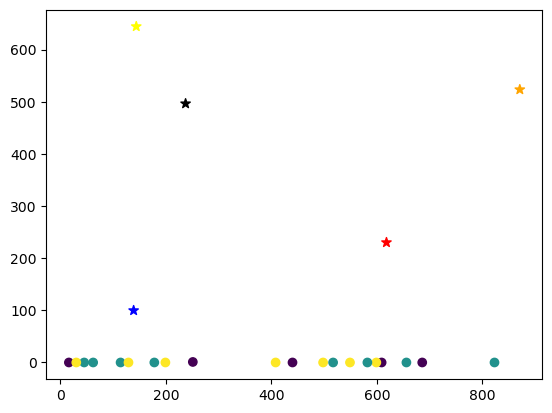

In [16]:
fr=q['Location']
#fr.values.reshape(len(fr),1)
gr=q['Ground']
#gr.values.reshape(len(gr),1)
plt.scatter(fr,gr,c=fh)
centroids=km.cluster_centers_
centroids_x=centroids[:,0]
centroids_y=centroids[:,2]
color=["red","blue","black","orange","yellow"]
plt.scatter(centroids_x,centroids_y,marker="*",s=50,color=color)
plt.show()


AgglomerativeClustering(n_clusters=5)

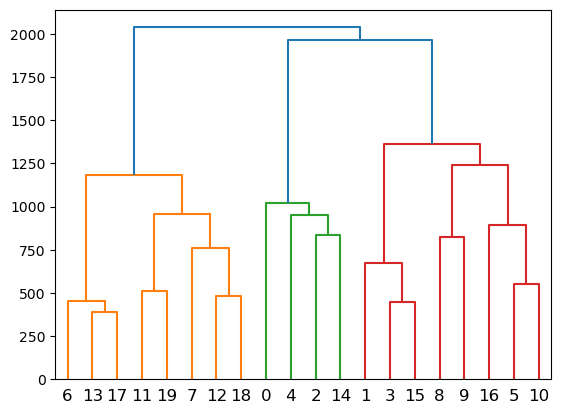

In [19]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(q,method="ward",metric="euclidean"))
from sklearn.cluster import AgglomerativeClustering
ad=AgglomerativeClustering(n_clusters=5)
w=ad.fit(q)
w

In [20]:
ts=ad.fit_predict(q)
ts

array([2, 3, 2, 3, 2, 1, 0, 0, 4, 4, 1, 0, 0, 0, 2, 3, 1, 0, 0, 0],
      dtype=int64)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


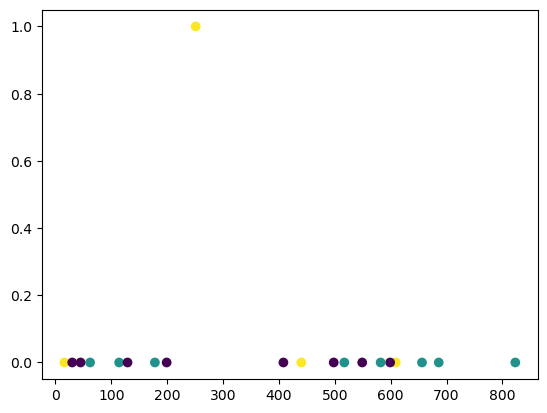

In [21]:
sa=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
st=sa.fit_predict(q)
st
import matplotlib.pyplot as plt
plt.scatter(q["Location"],q["Ground"],c=st)
plt.show()